In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mall_customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
#Dropping the unnecesssary feature 'CustomerID'
data = data.drop(['CustomerID'],axis=1)


In [ ]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
v1 = data['Gender'].value_counts()
v1

Female    112
Male       88
Name: Gender, dtype: int64

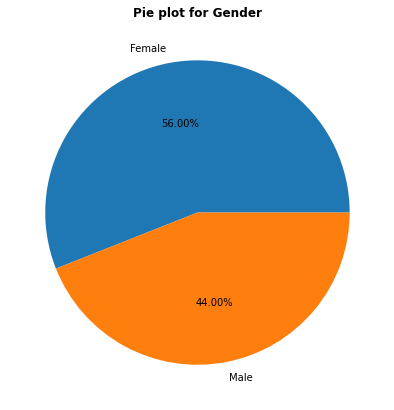

In [ ]:
label = v1.index

#pie plot for gender
plt.figure(figsize=(12,7))
plt.pie(v1, labels=label, autopct='%.2f%%')
plt.title('Pie plot for Gender',fontweight='bold',size=12)
plt.show()

#### Observations

*There are more female customers (56%) compared to the male customers (44%).*

In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
#plot for age
data.Age.min()


18

In [ ]:
data.Age.max()

70

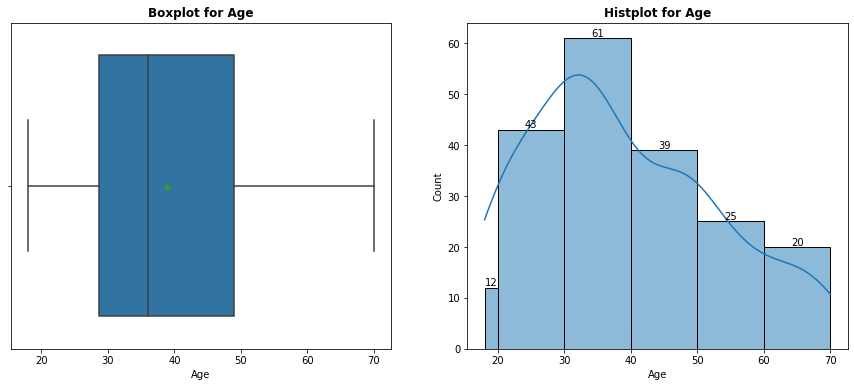

In [ ]:
#plotting for the age group

b1 = [18,20,30,40,50,60,70]
plt.subplots(1,2,figsize=(15,6))


plt.subplot(121)
sns.boxplot(x='Age',data=data,showmeans=True)
plt.title('Boxplot for Age',fontweight='bold',size=12)


plt.subplot(122)
ax = sns.histplot(data=data,x='Age',bins=b1,kde=True)

for container in ax.containers:
 ax.bar_label(container)
plt.title('Histplot for Age',fontweight='bold',size=12)
plt.show()

### Observation 2:

- *No outliers present in the given feature.*
- *The mean is greater than the median, so the distribution is right skewed.*
- *The customer with the age group between 30-40 are more in numbers, followed by the age group between 20-30 and 40-50.*

In [ ]:
data['Annual Income (k$)'].min()


15

In [ ]:
data['Annual Income (k$)'].max()


137

In [ ]:
b2 = [15,20,40,60,80,100,120,137]

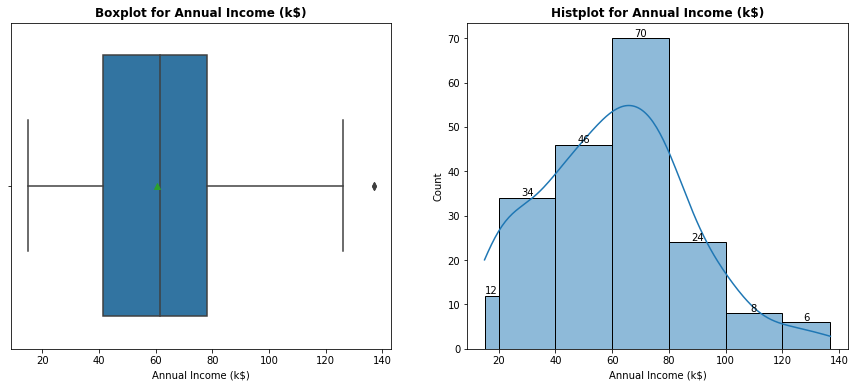

In [ ]:
#plotting for the Annual Income(K$) group
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.boxplot(x='Annual Income (k$)',data=data,showmeans=True)
plt.title('Boxplot for Annual Income (k$)',fontweight='bold',size=12)

plt.subplot(122)
ax1 = sns.histplot(data=data,x='Annual Income (k$)',bins=b2,kde=True)
for container in ax1.containers:
 ax1.bar_label(container)
plt.title('Histplot for Annual Income (k$)',fontweight='bold',size=12)

plt.show()

### Observation 3:

- *There is just 1 outlier present in this feature.*
- *The mean is less than the median, so the distribution is left skewed.*
- *The customers with annual income (k$) between 60-80 are more in number followed by 40-60.*

In [ ]:
data['Spending Score (1-100)'].min()


1

In [ ]:
data['Spending Score (1-100)'].max()

99

In [ ]:
b3 = [1,10,20,30,40,50,60,70,80,90,99]


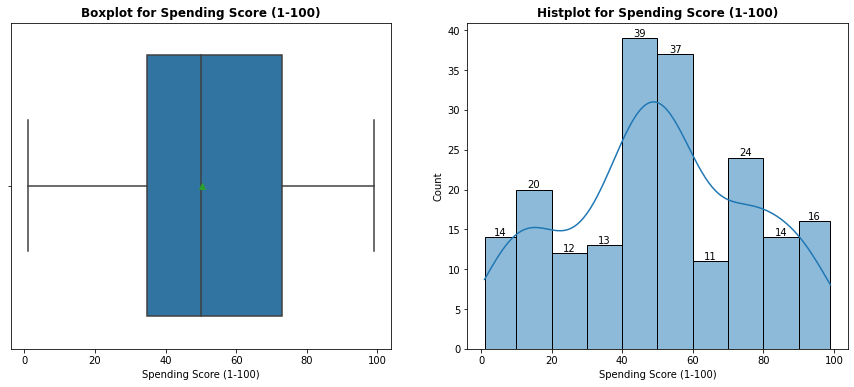

In [ ]:
#plotting for the Spending Score(1-100) group
plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.boxplot(x='Spending Score (1-100)',data=data,showmeans=True)
plt.title('Boxplot for Spending Score (1-100)',fontweight='bold',size=12)


plt.subplot(122)
ax2 = sns.histplot(data=data,x='Spending Score (1-100)',bins=b3,kde=True)
for container in ax2.containers:
 ax2.bar_label(container)
plt.title('Histplot for Spending Score (1-100)',fontweight='bold',size=12)

plt.show()

### Observation 4:

- *No outliers present in the given feature.*
- *The feature is normally distributed.*
- *The customer with the spending score of 40-60 are maximum in numbers (76).*

### Bivariate Analysis

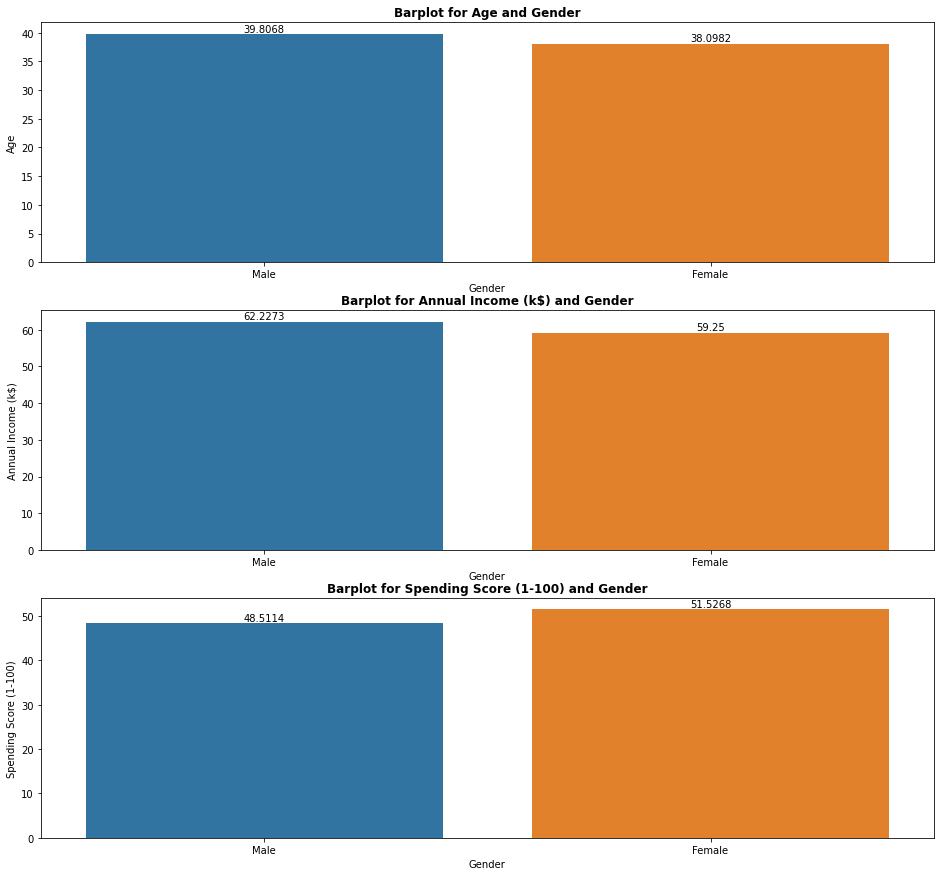

In [ ]:
#plotting for Age and Gender
plt.subplots(3,1,figsize=(16,15))


plt.subplot(311)
ax3 = sns.barplot(data=data,y='Age',x='Gender',ci=None)
for container in ax3.containers:
 ax3.bar_label(container)
plt.title('Barplot for Age and Gender',fontweight='bold',size=12)

#plotting for Annual Income and Gender
plt.subplot(312)
ax4 = sns.barplot(data=data,y='Annual Income (k$)',x='Gender',ci=None)
for container in ax4.containers:
 ax4.bar_label(container)
plt.title('Barplot for Annual Income (k$) and Gender',fontweight='bold',size=12)

#plotting for Spending Score and Gender
plt.subplot(313)
ax5 = sns.barplot(data=data,y='Spending Score (1-100)',x='Gender',ci=None)
for container in ax5.containers:
 ax5.bar_label(container)
plt.title('Barplot for Spending Score (1-100) and Gender',fontweight='bold',size=12)
plt.show()

#### Observation 5:

- *Average Age of Male Customers are 39.8 where as for female customers the average age is 38.*
- *For Male Customers the average annual income is 62.2K$, where as for feamale customers this is 59.2k$.*
- *For Male Customers the average spending score is 48.5, where as for feamale customers this is 51.5.*

In [ ]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
X = data.iloc[:, [2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Model Building

### 1. K-Means Clustering

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

In [ ]:
kmeans.labels_

array([8, 7, 3, 7, 8, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 8, 7, 8, 7, 8, 7,
       3, 7, 3, 7, 8, 0, 8, 7, 3, 7, 3, 7, 3, 7, 3, 7, 8, 7, 8, 7, 8, 0,
       8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 4, 1, 4, 9, 4, 9, 4,
       1, 4, 9, 4, 9, 4, 9, 4, 9, 4, 1, 4, 9, 4, 1, 4, 1, 4, 9, 4, 9, 4,
       9, 4, 9, 4, 9, 4, 1, 4, 9, 4, 1, 4, 9, 4, 1, 4, 9, 4, 9, 4, 9, 4,
       9, 4, 9, 4, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int32)

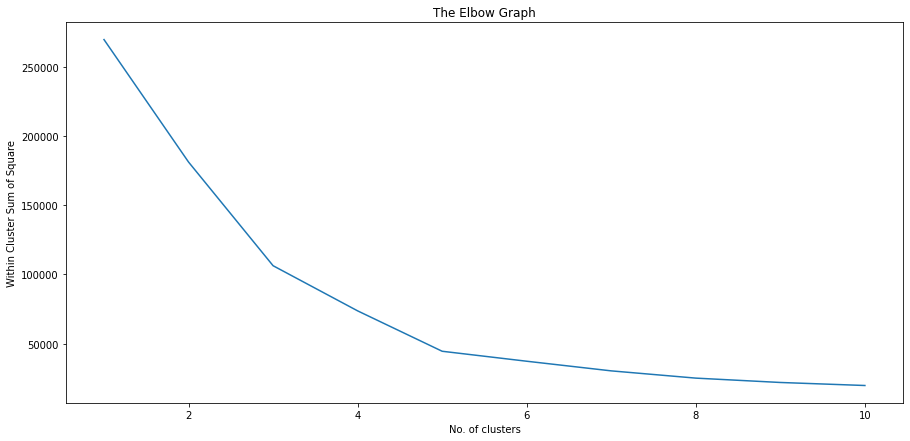

In [ ]:
# Plot the elbow graph

plt.figure(figsize = (15, 7))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

##### We are the getting the optimal value of K = 5 with the Elbow Graph.

**Cross Check the optimal value value of K with silhouette Score.**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
clusters_range = np.arange(2,11)

In [ ]:
for cluster in clusters_range:
 kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(X)
 
 score = silhouette_score(X, kmeans.labels_, metric='euclidean')
 print(f'for cluster: {cluster} --> Silhouetter Score: %.3f' % score)

for cluster: 2 --> Silhouetter Score: 0.285
for cluster: 3 --> Silhouetter Score: 0.468
for cluster: 4 --> Silhouetter Score: 0.493
for cluster: 5 --> Silhouetter Score: 0.554
for cluster: 6 --> Silhouetter Score: 0.538
for cluster: 7 --> Silhouetter Score: 0.527
for cluster: 8 --> Silhouetter Score: 0.456
for cluster: 9 --> Silhouetter Score: 0.450
for cluster: 10 --> Silhouetter Score: 0.450


***We should consider the K=5 based on the Elbow Curve and Silhouttee Score.***

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 200, random_state = 42)

In [ ]:
y = kmeans.fit_predict(X)

In [ ]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

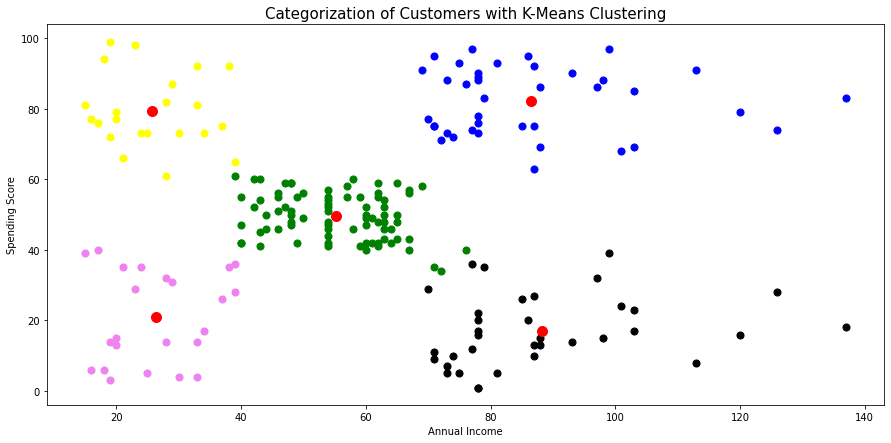

In [ ]:
# Visualize all the clusters

plt.figure(figsize=(15, 7))


plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'green', label = 'Cluster1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'black', label = 'Cluster2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'violet', label = 'Cluster3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 50, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 50, c = 'blue', label = 'Cluster5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.title("Categorization of Customers with K-Means Clustering", size = 15)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

## **Model Interpretation**

1. ***Cluster 1 (Green Color) -> average in terms of earning and spending.***
2. ***Cluster 2 (Black Color) -> earning high but spending less***
3. ***Cluster 3 (Violet Color) -> Earning less , spending less***
4. ***Cluster 4 (Yellow Color) -> earning less but spending more***
5. ***Cluster 5 (Blue Color) -> earning high and also spending high [TARGET SET]***

### 2. Agglomerative Clustering

In [ ]:
siliuette_list_hierarchical = []

for cluster in range(2,12):
    for linkage_method in ['single', 'ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean', n_clusters=cluster).fit_predict(X)
        
        sil_score = silhouette_score(X, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['clusters', 'sil_score','linkage_method', 'number_of_clusters'])

In [ ]:
df_hierarchical.sort_values('sil_score', ascending=False)

,clusters,sil_score,linkage_method,number_of_clusters
13,5,0.552995,ward,5
15,5,0.552995,complete,5
19,6,0.543666,complete,6
22,7,0.539401,average,7
17,6,0.538021,ward,6
23,7,0.537220,complete,7
26,8,0.523290,average,8
21,7,0.519905,ward,7
30,9,0.502322,average,9
10,4,0.495387,average,4


In [ ]:
#model building
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

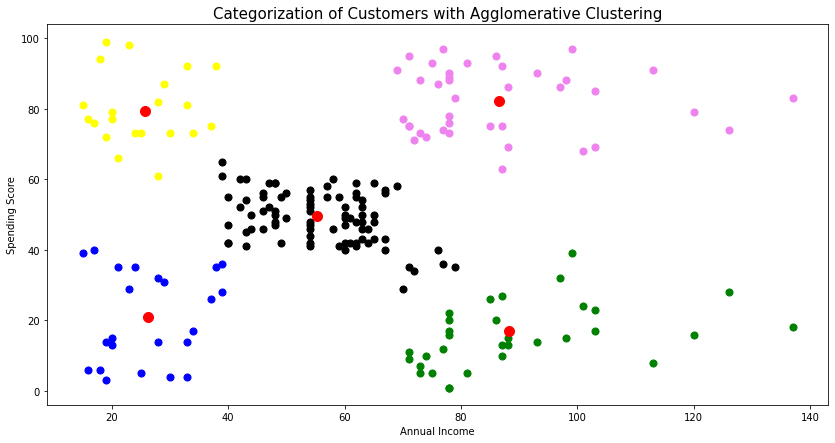

In [ ]:
# Visualize all the clusters

plt.figure(figsize=(14, 7))


plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'green', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'black', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'violet', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'blue', label = 'Cluster5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.title("Categorization of Customers with Agglomerative Clustering", size = 15)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

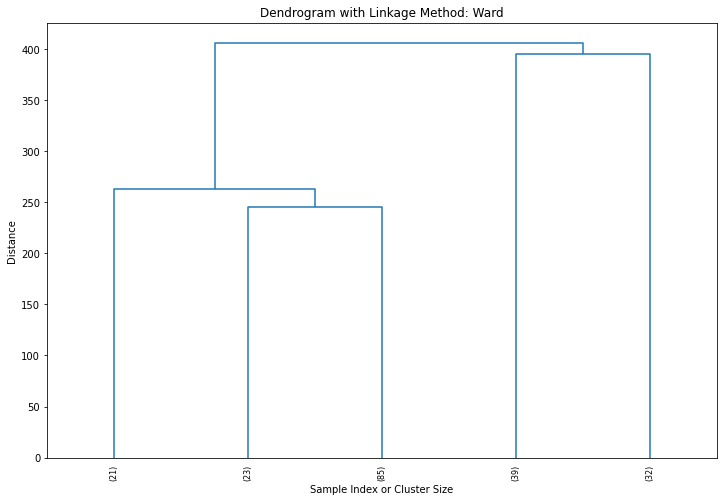

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12,8)) 
plt.title("Dendrogram with Linkage Method: Ward") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(X, method='ward'), p = 5, truncate_mode = "lastp", leaf_rotation = 90, color_threshold = 40, leaf_font_size = 8) 
plt.show() 

## Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights

In [ ]:
kmeans_= KMeans(n_clusters=5, random_state=40).fit_predict(X)

In [ ]:
hierarchical_= AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5).fit_predict(X)

In [ ]:
kmeansSilhouette_Score        = silhouette_score(X, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = silhouette_score(X, hierarchical_, metric='euclidean')

In [ ]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.553932
1,Hierarchical,0.552995
